Format and emojis: ✅ for solution, 📊 for graph captions, 💬 for comments

Copy these ones so that we all use the same ones (Windows 11)

In [12]:
from IPython.display import display, Markdown, Latex
def printmd(string):
    display(Markdown(string))

This function lets you print markdown with python code block.

# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October the 31st, 2021 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/


(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

### Overview

This year's Assignment 2 is all about analyzing the network of rappers.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

# Part 0: Building the network

 To create our network, we downloaded the rapper Wiki pages from each coast (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions.

* Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the rapper pages with the Wikipedia API.

> ✅ Firstly, we iterate over all the rapper text files and we add them as nodes in the network, while also including some attributes like `Coast` and `Content Length`. After that, we iterate again over all of the same files, doing the following:
> * We search for **all** Wikipedia internal links that follow a specific format (we do that with a regular expression, explained in the next section). 
> * Some times these links include more than one wording (separated by '|'), but we are only interested in the first one.
> * Then, we check if the resulting word or phrase is in the collection of rapper names we were given at the start of Week 4.
> * If it is, then we connect the rapper on which file we are iterating over, edge origin, to the rapper in the Wikipedia internal link, edge destination (the direction is important).

* Show the regular expressions you have built and explain in details how they work.

> ✅ The expression is the following `\[\[(.*?)\]\]`, which essentially matches everything between double square brackets. In particular:
> * The square brackets `\[ \]` are *escaped* with a backlash (`\`) just so they are to matched literally.
> * The parenthesis `( )` form a group (although as it's only one group in the whole expression that we don't need to match as repeating, the parenthesis can be removed).
> * `.*?`: This is a part of the pattern enclosed in parentheses and it's the interesting part. It uses the following elements:
>   * `.`: This period (dot) is a metacharacter in regular expressions that matches any character except for a newline character.
>   * `*`: This asterisk is another metacharacter and it means "zero or more occurrences of the preceding element." So, `.*` means zero or more occurrences of any character.
>   * `?`: The question mark is another metacharacter, and when used after `*`, it makes the `*` operator non-greedy, meaning it matches as few characters as possible. Without the `?`, `.*` would be greedy and match as many characters as possible, so from the first link's `[[`, to the last link's `]]`.

# Part 1: Network visualization and basic stats

Visualize your network of rappers (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you have already generated the network and extracted the largest weakly connected component (the "largest weakly connected component" of a directed network is the subgraph consisting of the nodes that would constitute the largest connected component if the network were undirected) . The visualization and statistics should be done for the largest weakly connected component only.

In [3]:
import pickle

# Load graph object from pickle file that we saved in lecture 4
G = pickle.load(open('./Week4_graph.pickle', 'rb'))
SEED = 1234

# Extract the largest weakly connected component
import networkx as nx

largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
DIRECTED_GRAPH = G.copy() # directed graph
UNDIRECTED_GRAPH = G.to_undirected() #undirected graph

## _Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

* What is the number of nodes in the network?

In [4]:
printmd(f"> ✅ Number of nodes: {len(G.nodes)}")

> ✅ Number of nodes: 727

* What is the number of links?

In [5]:
printmd(f"> ✅ Number of edges: {len(G.edges)}")

> ✅ Number of edges: 5803

* Who is the top connected rapper? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?

In [6]:
G = DIRECTED_GRAPH
most_connected_in = sorted(dict(G.in_degree).items(), key=lambda x:x[1], reverse=True)[0]
most_connected_out = sorted(dict(G.out_degree).items(), key=lambda x:x[1], reverse=True)[0]
printmd(f"> ✅ The most in-connected rapper is '{most_connected_in[0]}' with {most_connected_in[1]} in-degree and " +
        f"the most out-connected rapper is '{most_connected_out[0]}' with {most_connected_out[1]} out-degree.")

> ✅ The most in-connected rapper is 'Snoop Dogg' with 127 in-degree and the most out-connected rapper is 'Drag-On' with 52 out-degree.

> ✅ 

* Who are the top 5 most connected east-coast rappers (again in terms of in/out-degree)? 

> ✅ 

* Who are the top 5 most connected west-coast rappers (again in terms of in/out-degree)?

> ✅ 

* Plot the in- and out-degree distributions for the whole network. 
   * Use axes that make sense for visualizing this particular distribution.
   * What do you observe? 
   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?

> 📊

> ✅ 

* Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?

> ✅ 

* Compare the two degree distributions two the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.

> ✅ 

## _Exercise 1b_: Visualization (see lecture 5 for more hints)

* Create a nice visualization of the total (directed) network:
   * Color nodes according to the role;
   * Scale node-size according to degree;
   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
   * Whatever else you feel like that would make the visualization nicer.

* Describe the structure you observe. What useful information can you decipher from this?

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from rappers' Wikipedia pages.

Here's what you need to do:
> * Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. Explain your process and comment on your results.

In [5]:
import nltk
import string
import os
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data is downloaded (e.g., punkt tokenizer models, wordnet)
nltk.download('punkt')
nltk.download('wordnet')

def process_texts(directory):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens =[]
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
            # 1. Tokenize the pages into individual strings
            tokens = nltk.word_tokenize(text)
            # 2. Remove all punctuation from your list of tokens
            tokens_no_punct = [word for word in tokens if word not in string.punctuation]
            # 3. Set everything to lower case
            tokens_lower = [word.lower() for word in tokens_no_punct]
            # 4. (Optional) Lemmatize your words
            lemmatized_tokens.extend([lemmatizer.lemmatize(word) for word in tokens_lower])
    return lemmatized_tokens

# Process texts in eastcoasttexts and westcoasttexts directories
east_coast_tokens = process_texts('../lectures/lecturer_data/eastcoasttexts')
west_coast_tokens = process_texts('../lectures/lecturer_data/westcoasttexts')


[nltk_data] Downloading package punkt to /Users/madis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/madis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from collections import Counter


def create_tf_list(tokens):
    # Count the occurrences of each term
    term_frequencies = Counter(tokens)
    # Optionally, convert the term frequencies to a list of tuples and sort by frequency
    tf_list = sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)
    return tf_list

east_coast_tf_list = create_tf_list(east_coast_tokens)
west_coast_tf_list = create_tf_list(west_coast_tokens)

east_coast_tf_list[:5], west_coast_tf_list[:5]

([('the', 28859), ('and', 15801), ('a', 15625), ('in', 13219), ("''", 12327)],
 [('the', 17227), ('and', 9745), ('a', 9176), ('in', 7763), ("''", 7706)])

In [7]:
def process_tf_tr_list(tf_list, comparison_tf_dict, c=1):
    total_terms = sum(tf for _ , tf in tf_list)
    total_comparison_terms = sum(comparison_tf_dict.values())

    normalized_tf_list = [(word, tf / total_terms) for word, tf in tf_list]
    normalized_comparison_tf_dict = {word: tf / total_comparison_terms for word, tf in comparison_tf_dict.items()}

    tf_tr_list = [(word, (tf) / (normalized_comparison_tf_dict.get(word, 0) + c)) for word, tf in normalized_tf_list]
    tf_tr_list = sorted(tf_tr_list, key=lambda x: x[1], reverse=True)
    
    return tf_tr_list

east_coast_tf_dict = dict(east_coast_tf_list)
west_coast_tf_dict = dict(west_coast_tf_list)

c= 0.0001

east_coast_tf_tr_list = process_tf_tr_list(east_coast_tf_list, west_coast_tf_dict, c)
west_coast_tf_tr_list = process_tf_tr_list(west_coast_tf_list, east_coast_tf_dict, c)

east_coast_tf_tr_list[:10], west_coast_tf_tr_list[:10]

([("o'neal", 5.567705636484037),
  ('cena', 5.1922792377683225),
  ('york', 3.942118060163709),
  ('jay-z', 3.581860427381232),
  ('brooklyn', 3.5023384091660965),
  ('dmx', 3.215362072901697),
  ('wallace', 2.7819871848149464),
  ('queen', 2.761972766481375),
  ('wu-tang', 2.7232009382103572),
  ('kim', 2.6316307667949896)],
 [('lamar', 6.181090198943508),
  ('dre', 5.7172020635118415),
  ('e-40', 5.22731877012366),
  ('snoop', 5.155369602372682),
  ('california', 5.068951318825307),
  ('dogg', 4.713733422915078),
  ('gomez', 4.057403669313368),
  ('cube', 3.998715089251526),
  ('park', 3.641038891721774),
  ('dr.', 3.625235715654068)])

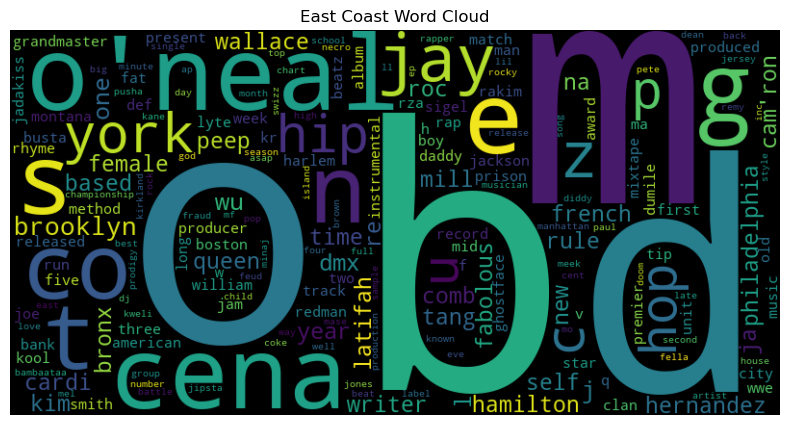

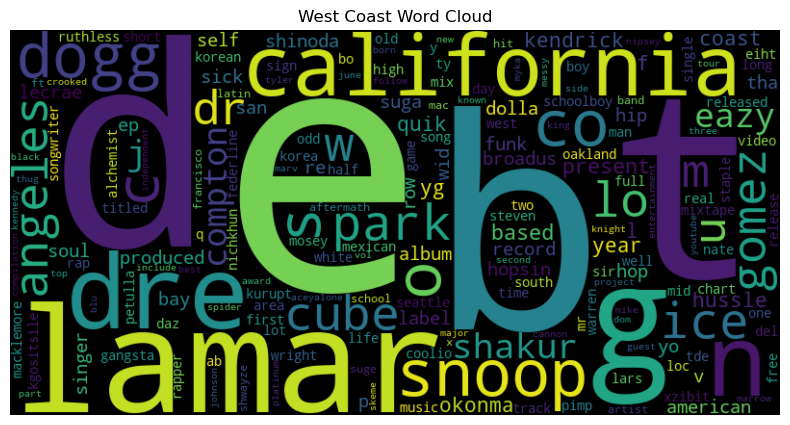

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

scal = 100

def generate_wordcloud_string(tf_tr_list):
    wordcloud_string = ""
    for word, score in tf_tr_list:
        repeat_count = math.ceil(score * scal)
        wordcloud_string += (word + ' ') * repeat_count
    return wordcloud_string

def create_wordcloud(tf_tr_list, title):
    wordcloud_string = generate_wordcloud_string(tf_tr_list)
    wordcloud = WordCloud(collocations=False, width=800, height=400).generate(wordcloud_string)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    #plt.show()

# Generate word clouds
create_wordcloud(east_coast_tf_tr_list, "East Coast Word Cloud")
create_wordcloud(west_coast_tf_tr_list, "West Coast Word Cloud")

# Singular letters probably appear because of Jay-Z, Becky G and similar name pairs

> * For each coast, what are the 5 words with the highest TR scores? Comment on your result.

In [17]:
def highest_tr(list):
    # Convert each item to a string in the desired format
    formatted_items = ["1. **{}:** {}".format(k, round(float(v), 2)) for k, v in list[:5]]

    # Join the string items with a newline character to create a single string
    formatted_string = "\n".join(formatted_items)

    # Use IPython.display.Markdown to print the string
    printmd(formatted_string)

highest_tr(east_coast_tf_tr_list)
highest_tr(west_coast_tf_tr_list)

1. **o'neal:** 5.57
1. **cena:** 5.19
1. **york:** 3.94
1. **jay-z:** 3.58
1. **brooklyn:** 3.5

1. **lamar:** 6.18
1. **dre:** 5.72
1. **e-40:** 5.23
1. **snoop:** 5.16
1. **california:** 5.07

# Part 3: Communities

Find communities and their modularity (from lecture 7).

Here's what you need to do:


 * In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 


> ✅ 

* Find communities in the network

In [7]:
import community as community_louvain

rap_graph = UNDIRECTED_GRAPH 
partition = community_louvain.best_partition(rap_graph)

* ...and explain how you chose to identify the communities: Which algorithm did you use and how does it work?


> ✅ 

* Comment on your results:
    * How many communities did you find in total?


In [8]:
printmd(f"> ✅ Number of communities: {max(partition.values()) + 1}")

> ✅ Number of communities: 9

   * Compute the value of modularity with the partition created by the algorithm.


In [9]:
modularity_value = community_louvain.modularity(partition, rap_graph)

printmd(f"> ✅ Modularity: {modularity_value:.3f}")

> ✅ Modularity: 0.410

>   * Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.


In [10]:
import matplotlib.pyplot as plt
from collections import Counter
### TODO PROBABLY BETTER TO HAVE THIS ON TOP OF THE DOC
def create_histogram(data, title, xlabel, ylabel, color='blue', figuresize= (10, 6)):
    counter = Counter(data)
    labels = list(counter.keys())
    values = list(counter.values())

    plt.figure(figsize=figuresize)
    plt.bar(labels, values, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


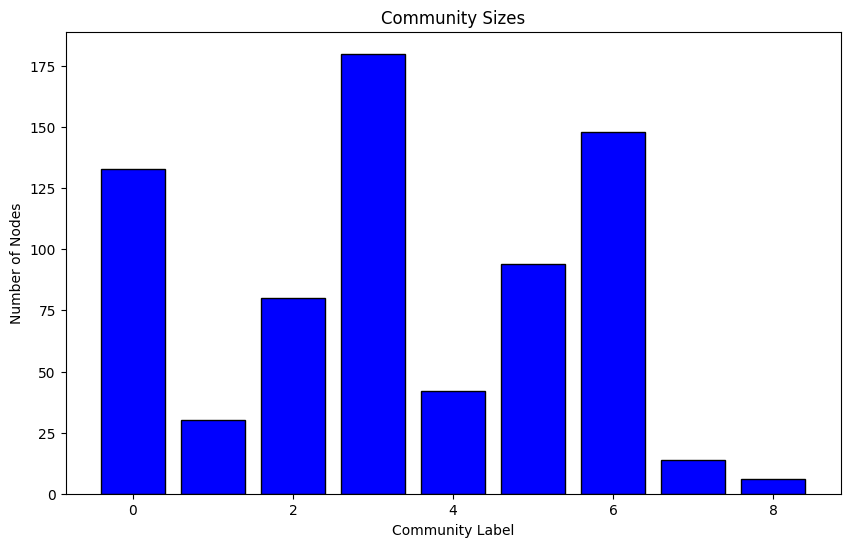

In [11]:
community_labels = list(partition.values())

create_histogram(community_labels, 'Community Sizes', 'Community Label', 'Number of Nodes')

> 📊

> * Now, partition your rappers into two communities based on which coast they represent.
>   * What is the modularity of this partition? Comment on the result.

In [12]:
def calculate_modularity(graph: nx.Graph):
    L = graph.number_of_edges()
    communities = ["west", "east"]
    
    communities_nodes =[]
    for community in communities:
        communities_nodes.append([n for n, attr in graph.nodes(data=True) if attr['coast'] == community])
    
    return nx.community.modularity(graph, communities_nodes)


modularity = calculate_modularity(rap_graph)
printmd(f"> ✅ The modularity of the partition is: {modularity:.3f}")

> ✅ The modularity of the partition is: 0.250

> ✅ modularity of the coast partition is smaller than the modularity of the best partition. #TODO Add more description 

# Part 4: Sentiment of communities

Analyze the sentiment of communities (lecture 8). More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below:
* Average the average sentiment of the nodes in each community to find a community-level sentiment.

Here's what you need to do (use the LabMT wordlist approach):


* Calculate and store sentiment for every rapper


In [13]:
labmt_dict = {}
with open('..\lectures\data\labMIT-1.0.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Skipping header line
        parts = line.strip().split('\t')
        word = parts[0]
        score = float(parts[2])
        labmt_dict[word] = score

def calculate_sentiment(tokens):
    total_score = 0
    num_tokens = 0
    
    for token in tokens:
        if token in labmt_dict:
            total_score += labmt_dict[token]
            num_tokens += 1
            
    if num_tokens == 0:
        return 0
    
    return total_score / num_tokens

In [55]:
import re
ROOT_FOLDER = "../lectures/data/"

def tokenize_text(text):
    return re.findall(r'\b\w+\b', text.lower())

def read_text_from_file(filename):
    try:
        with open(filename, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        print(f"An error occurred while processing the file {filename}")
        return None

def extract_filename_from_name(rap_name, root_folder, coast):
    safe_name = rap_name.replace("?", "%3F")
    filename = f"{root_folder}{coast}/{safe_name}.txt"
    return filename

def add_sentiment_to_nodes(net, root_folder):
    coast_path_dictionary={
        "east": "east_coast",
        "west": "west_coast"
    } 
    for node, attrs in net.nodes(data=True):
        coast = coast_path_dictionary[attrs['coast']]
        filename = extract_filename_from_name(node, root_folder, coast)
        
        text = read_text_from_file(filename)
        if text is None:
            continue

        tokens = tokenize_text(text)
        sentiment = calculate_sentiment(tokens)
        
        net.nodes[node]['sentiment'] = sentiment


rap_graph_with_sentiment = DIRECTED_GRAPH.copy()
add_sentiment_to_nodes(rap_graph_with_sentiment, ROOT_FOLDER)

* Create a histogram of all rappers' associated sentiments.


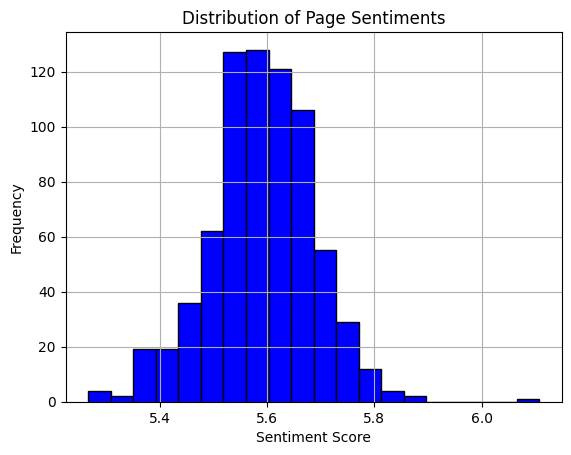

In [56]:
sentiments = [attrs['sentiment'] for _, attrs in rap_graph_with_sentiment.nodes(data=True)]

    
plt.hist(sentiments, bins=20, color='blue', edgecolor='black')

plt.title("Distribution of Page Sentiments")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)

* What are the 10 rappers with happiest and saddest pages?


In [57]:
def top_and_bottom_rappers_by_sentiment(net):
    sorted_rappers = sorted(net.nodes(data=True), key=lambda x: x[1]['sentiment'])
    
    bottom_10 = sorted_rappers[:10]
    top_10 = sorted_rappers[-10:]
    
    print("10 Rappers with the Saddest Pages:")
    for i, (rapper, attrs) in enumerate(bottom_10, 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})")

    print("\n10 Rappers with the Happiest Pages:")
    for i, (rapper, attrs) in enumerate(reversed(top_10), 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})")
        
top_and_bottom_rappers_by_sentiment(rap_graph_with_sentiment)

10 Rappers with the Saddest Pages:
1. Slip Capone (Sentiment: 5.27)
2. Slow Pain (Sentiment: 5.27)
3. Ol' Dirty Bastard (Sentiment: 5.28)
4. Droop-E (Sentiment: 5.29)
5. Knightowl (Sentiment: 5.32)
6. Killa Sin (Sentiment: 5.34)
7. Sir Jinx (Sentiment: 5.35)
8. Rydah J. Klyde (Sentiment: 5.36)
9. Black Rob (Sentiment: 5.36)
10. The Jacka (Sentiment: 5.36)

10 Rappers with the Happiest Pages:
1. Phil Da Agony (Sentiment: 6.11)
2. Young Music DYMG (Sentiment: 5.89)
3. Skizzy Mars (Sentiment: 5.85)
4. Dave Free (Sentiment: 5.84)
5. Lamiere (Sentiment: 5.83)
6. Jay Critch (Sentiment: 5.83)
7. V. Rose (Sentiment: 5.83)
8. Mark Batson (Sentiment: 5.81)
9. Omega Crosby (Sentiment: 5.80)
10. Futuristic (rapper) (Sentiment: 5.80)



Now, compute the sentiment of each coast: 
* Which is the happiest and which is saddest coast according to the LabMT wordlist approach? (Take the coast's sentiment to be the average sentiment of the coast's rappers' pages (disregarding any rappers with sentiment 0).


In [58]:
import numpy as np
def sentiment_mean_for_coast(net, coast):
    sentiments = [attrs['sentiment'] for _, attrs in net.nodes(data=True) if attrs["coast"] == coast]
    return np.mean(sentiments)

east_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "east")
west_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "west")

# Determine happiest and saddest coasts
if east_coast_sentiment is not None and west_coast_sentiment is not None:
    if east_coast_sentiment > west_coast_sentiment:
        happiest_coast = "East"
        saddest_coast = "West"
    elif west_coast_sentiment > east_coast_sentiment:
        happiest_coast = "West"
        saddest_coast = "East"
    else:
        happiest_coast = saddest_coast = "Both coasts have the same sentiment."

    printmd(f"✅ The happiest coast is **{happiest_coast}** with an average sentiment of **{max(east_coast_sentiment, west_coast_sentiment):.3f}**.")
    printmd(f"✅ The saddest coast is **{saddest_coast}** with an average sentiment of **{min(east_coast_sentiment, west_coast_sentiment):.3f}**.")
else:
    printmd("❌ Unable to compute sentiment for one or both coasts.")



✅ The happiest coast is **West** with an average sentiment of **5.592**.

✅ The saddest coast is **East** with an average sentiment of **5.590**.

* Use the "label shuffling test" (Week 5 and 8) to test if the coast with the highest wikipedia page sentiment has a page sentiment that is significantly higher (5% confidence bound) than a randomly selected group of rappers of the same size.


In [59]:
import random
random.seed(SEED)

def label_shuffling_test(rap_network, happiest_coast):
    coast_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['coast'].lower() == happiest_coast.lower() and attrs['sentiment'] != 0]
    all_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['sentiment'] != 0]

    actual_coast_mean = np.mean(coast_sentiments)

    num_trials = 1000
    fake_means = []

    for _ in range(num_trials):
        random.shuffle(all_sentiments)
        fake_coast_mean = np.mean(all_sentiments[:len(coast_sentiments)])
        fake_means.append(fake_coast_mean)

    higher_than_random = len([x for x in fake_means if actual_coast_mean > x])

    p_value_higher = higher_than_random / num_trials

    printmd(f"✅ Actual mean sentiment of **{happiest_coast.capitalize()} Coast** pages: **{actual_coast_mean:.2f}**")
    printmd(f"✅ The Actual mean was higher than random in: **{p_value_higher*100}%** of cases")

    # Conclusion based on a 5% significance level
    if p_value_higher >= 0.95:
        printmd("✅  Proved the hypothesis that {happiest_coast} have sentiment significantly higher than random group.")
    else:
        printmd(f"❌ Fail to prove the hypothesis that {happiest_coast} coast have sentiment significantly higher than random group.")

# Example usage assuming `rap_graph_with_sentiment` is your network and the happiest coast is "West"
label_shuffling_test(rap_graph_with_sentiment, happiest_coast)

✅ Actual mean sentiment of **West Coast** pages: **5.59**

✅ The Actual mean was higher than random in: **62.4%** of cases

❌ Fail to prove the hypothesis that West coast have sentiment significantly higher than random group.


* Does the result make sense to you? Elaborate.


> ✅ #TODO modify.  To be honest I would like to see some more diverse results but i think due to style in which the wikipedia pages are written the mean sentiment will be around neutral 



**Congratulations for making it to the end of the Assignment. Good luck with your independent project**

